<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Segundo%20Avance%20Informe%20SubArrayMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problema de Optimización**


Los problemas de optimización son de los más comunes que se pueden encontrar en cualquier tipo de trabajo. Estos buscan la **máxima eficiencia** para la resolución de problemas, en otras palabras, maximizan o minimizan el valor de una función.

El problema planteado en este informe es el de buscar el **sub arreglo** que contiene la **máxima suma** de valores de los elementos de un arreglo de largo **n**.

A continuación se presentan la entrada y salida esperada para este problema:

**Entrada**: Arreglo de **n** datos comparables.

**Salida**: **Sub-arreglo** que va desde **i** hasta **j** siendo **i<j<n** y cuya suma de valores sea mayor o igual a la suma de los elementos de los demás sub-arreglos que se pueden formar desde el arreglo original.

### **1.1 Ejemplo**

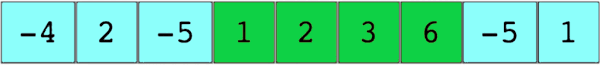

En la imagen se muestra un arreglo de números enteros de largo **n=9** donde el máximo sub-arreglo se marca en **color verde**, el cual va desde **arreglo[3]** hasta **arreglo[6]**, donde la **suma** de sus elementos (máxima) es **12**.

Cumpliendo con lo descrito anteiormente, **no existe un sub-arreglo cuya sumatoria de sus elementos sea mayor a 12**.

#**2. Descripción del Sub-Arreglo Máximo**

El algortimo recibe como parametro un arreglo o lista con **n** elementos comparables y retornará el sub-arreglo con la suma máxima de elementos.

1. El algoritmo se implementa de forma recursiva, divide al arreglo en 2 sub arreglos de largo N/2.
2. Se repite el paso 1 hasta obtener cada elemento del arreglo en un sub-arreglo independiente.
3. Se busca el sub-arreglo máximo de cada mitad recursivamente.
4. Luego se busca el sub array máximo que incluye al medio del arreglo.
5. Se retorna el máximo sub-arreglo encontrado.



In [5]:
import math
import random
from termcolor import colored

# Función obtiene el máximo subarreglo que cruza por el medio.
def maxMidSubArray(arr, mid, verbose):
  print( "Primera llamada")
  sum = 0
  maxLeft = -math.inf
  low = 0  # Guarda la posición inicial del máximo subarreglo.

  # Se obtiene subArreglo mas grande de la izquierda.
  for i in range(mid - 1, -1, -1):
    sum = sum + arr[i]
    
    if (sum > maxLeft):
       maxLeft = sum
       low = i
  
  sum = 0
  maxRight = -math.inf
  high = len(arr) - 1 # Guarda la posición final del máximo subarreglo.
  
  # Se obtiene el subarreglo maximo de la derecha.
  for i in range (mid, len(arr)):
    sum = sum + arr[i]
    if (sum > maxRight):
      maxRight = sum
      high = i
  if (verbose == True):
    print("Suma izquierda:", maxLeft)
    print("Suma derecha:", maxRight)

  maxSum = maxLeft + maxRight

  # Si verbose es True, se muestran el subarreglo mayor que cruza por el medio.
  if (verbose == True):
    
    if (len (arr[low:high + 1]) > 1):
      print ("Maximo Subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high-1])[1:-1]}","blue"), ",", colored(f"{str(arr[high-1:high + 1])[1:-1]}","blue"), "\n")
    
    else:
      print ("Máximo subarreglo que pasa por el medio: ", colored(f"{str(arr[low: high])[1:-1]}","blue"), "\n")

  return ((maxLeft + maxRight), low, high)

# Función que obtiene el máximo subarreglo de manera recursiva.
def maxSubArray(arr, low, high, verbose):
  n = len (arr)
  
  # Caso base.
  if (n == 1):
    return (arr[0], low, low)

  # Se obtiene la mitad.
  mid = n//2

  # Subarreglo Izquierdo y derecho.
  leftArr = arr[: mid]
  rightArr = arr[mid : ]

  # Si verbose es True se muestran los subarreglos.
  if (verbose == True):
        print("SubArreglo Izquierdo: ", leftArr)
        print("SubArreglo Derecho: ", rightArr, "\n")
  
  # Se obtiene la suma máxima del subarreglo izquierdo y el indice de comienzo y fin.
  maxLeft, lowLeft, highLeft = maxSubArray(leftArr, low, mid - 1, verbose)
  
  # Se obtiene la suma máxima del subarreglo derecho y el indice de comienzo y fin.
  maxRight, lowRight, highRight = maxSubArray(rightArr, mid + 1, high, verbose)
  
  # Se obtiene la suma máxima del subarreglo que pasa por el centro.
  # y el indice de comienzo y fin.
  maxMid, lowMid, highMid = maxMidSubArray(arr, mid, verbose)

  # Se obtiene la máxima suma.
  maxSum = max (maxLeft, maxRight, maxMid)
  
  # Si el suma maxima es el subarreglo que pasa por el medio.
  if (maxSum == maxMid): 
    return maxSum, lowMid, highMid

  # Si el suma maxima es el subarreglo de la derecha.
  elif (maxSum == maxRight):
    return maxSum, lowRight, highRight

  # Si el suma maxima es el subarreglo de la izquierda.
  elif (maxSum == maxLeft):
    return maxSum, lowLeft, highLeft

a = random.sample(range(-100, 100), 6)
a = [-12,-80,-5,8,-13,26]
print("Arreglo de entrada: ", a)
b, i, j = maxSubArray(a, 0, len(a) - 1, verbose = True)
print ("La suma maxima es: ", b)
print ("El arreglo comienza en la posición", i, "y termina en la posición", j)


Arreglo de entrada:  [-12, -80, -5, 8, -13, 26]
SubArreglo Izquierdo:  [-12, -80, -5]
SubArreglo Derecho:  [8, -13, 26] 

SubArreglo Izquierdo:  [-12]
SubArreglo Derecho:  [-80, -5] 

SubArreglo Izquierdo:  [-80]
SubArreglo Derecho:  [-5] 

Primera llamada
Suma izquierda: -80
Suma derecha: -5
Maximo Subarreglo que pasa por el medio:   , -80, -5 

Primera llamada
Suma izquierda: -12
Suma derecha: -80
Maximo Subarreglo que pasa por el medio:   , -12, -80 

SubArreglo Izquierdo:  [8]
SubArreglo Derecho:  [-13, 26] 

SubArreglo Izquierdo:  [-13]
SubArreglo Derecho:  [26] 

Primera llamada
Suma izquierda: -13
Suma derecha: 26
Maximo Subarreglo que pasa por el medio:   , -13, 26 

Primera llamada
Suma izquierda: 8
Suma derecha: 13
Maximo Subarreglo que pasa por el medio:  8 , -13, 26 

Primera llamada
Suma izquierda: -5
Suma derecha: 21
Maximo Subarreglo que pasa por el medio:  -5, 8 , -13, 26 

La suma maxima es:  26
El arreglo comienza en la posición 2 y termina en la posición 2


# **3. Tiempo de Ejecución**

El algoritmo posee un tiempo de ejecución O(nlogn).

Un dato a tener en cuenta es que el peor y mejor caso de este algoritmo poseen el mismo tiempo de ejecución, ya que independiente de los elementos presentes en el arreglo, se ejecutarán la misma cantidad de divisiones y comparaciones para obtener el sub-arreglo máximo

### **3.1 Prueba del Teorema**

 Utilizando el **Teorema Maestro** se obtiene lo siguiente :

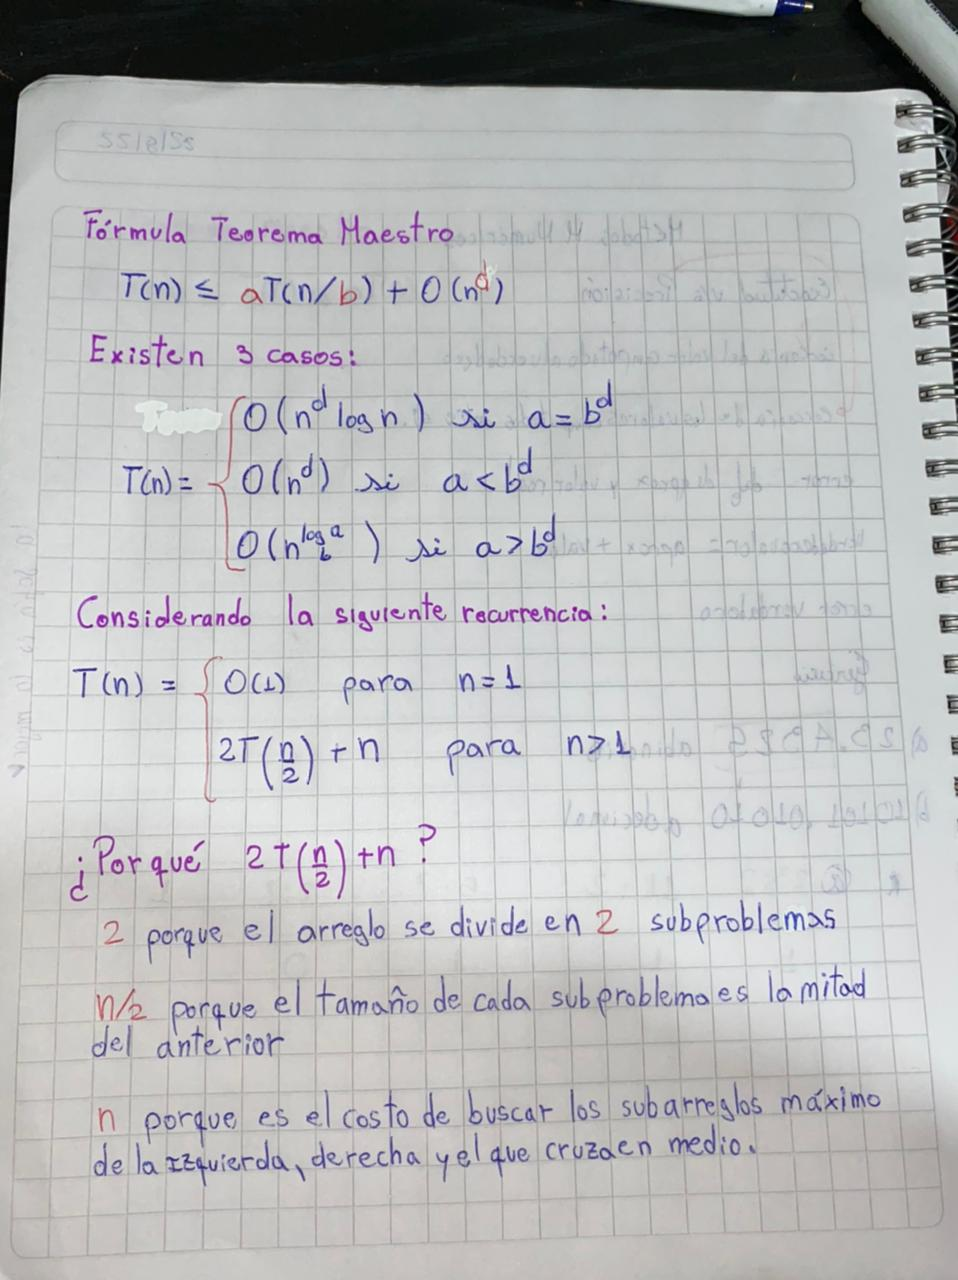
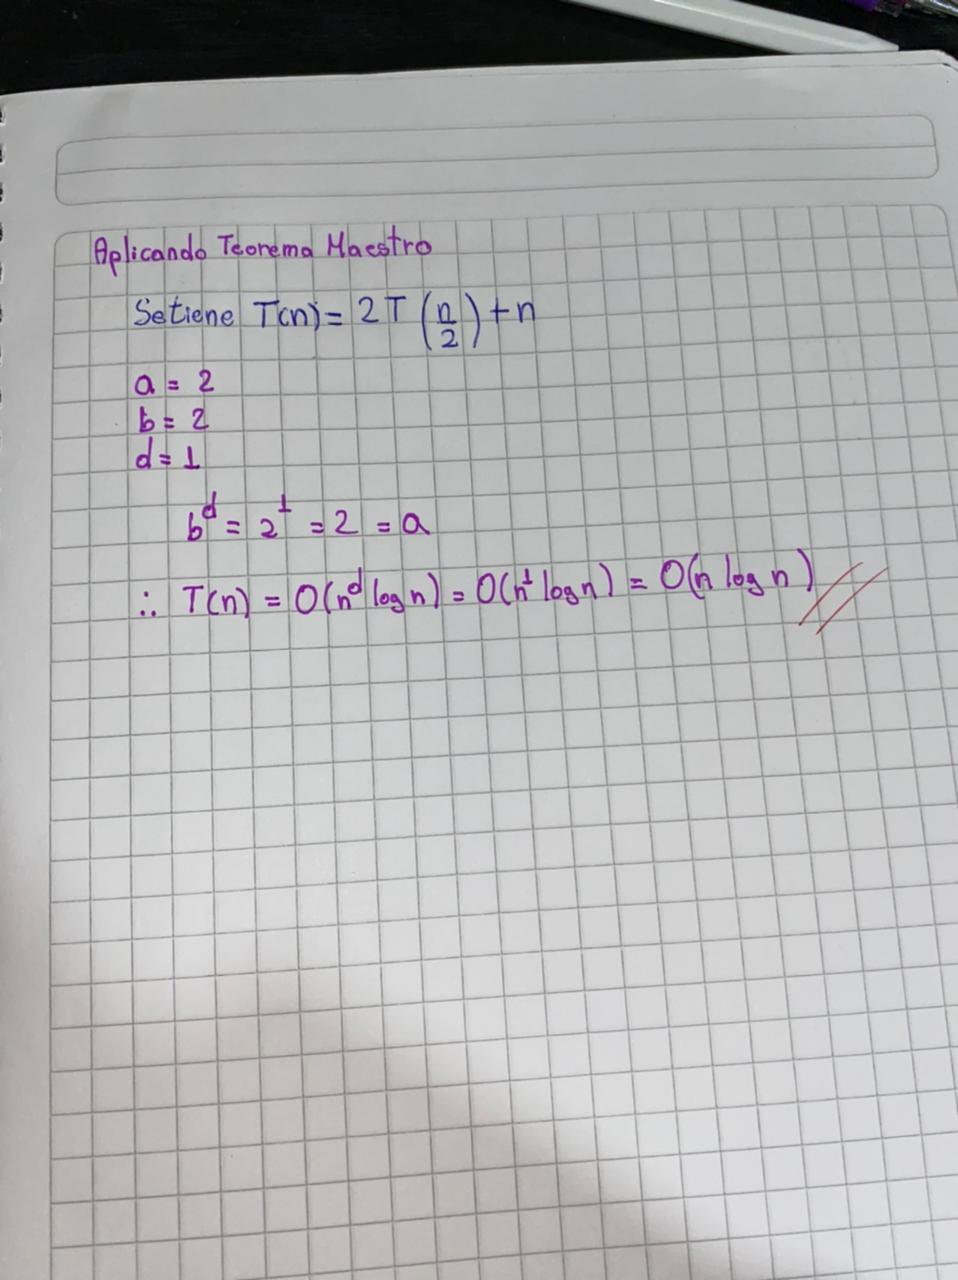

# **4. Correctitud**

### **4.1 Correctitud de MaxSubArrayMid**

Propiedad invariante de bucle: Por cada iteración i de la función MaxSubArrayMid, esta retornará la suma de los sub-arreglos máximos de la parte izquierda y la parte derecha del arreglo.


**Inicialización**: En la primera iteración i de la función, esta recibe un arreglo de largo 2 donde el sub-arreglo izquierdo y el derecho poseen un solo elemento siendo estos el sub-arreglo máximo respectivo de cada lado. Sumándo ambos sub-arreglos (izquierdo y derecho) la función retorna el máximo sub-arreglo que pasa por la posicón n/2 del arreglo ingresado a la función.

**Mantención**: En cada iteración i de la función, recibe un arreglo de largo n, obteniendo un sub-arreglo izquierdo máximo de largo < n/2 y un sub-arreglo derecho máximo de largo < n/2 donde la suma de ambos sub-arreglos generarán el sub-arreglo máximo que pasa por el centro del arreglo igresado a la función el cual es retornado por esta última.


### **4.2 Correctitud de MaxSubArray**

Utilizando inducción matemática se obtiene lo siguiente: 

Caso Base (n=1): Cuando el arreglo posee largo N=1 este se retorna, ya que al ser de un único elemento, es el único sub-arreglo existente por lo que su suma será máxima.

Caso General (n>1) : Se asume que MaxSubArray es correcto para todo problema de tamaño m<n. Para cualquier arreglo de largo n>1, el algoritmo divide a este en 2 sub-arreglos de largo n/2 < n y la función MaxSubArray procesará ambos sub-arreglos por lo que las llamadas recursivas son correctas. 

Finalmente al ser correcta la función MaxSubArrayMid, la función MaxSubArray retornará el máximo sub-arreglo encontrado en el arreglo ingresado inicialmente.

# **5. Experimentos**